# Data analysis - Google Trends

This jupyter notebook provides the code and graphics used for the chapter 4.3.4 in the project report regarding the data analysis of the Google Trends data.

In [126]:
## Import packages
import pandas as pd
import os
import sqlalchemy
import matplotlib.pyplot as plt
%matplotlib inline

## Load credentials
USER = os.getenv("GT_USER")
PASSWORD = os.getenv("GT_PASSWORD")
ENDPOINT = os.getenv("GT_ENDPOINT")
DATABASENAME = os.getenv("GT_DATABASENAME")

## Define database connection
url = f"postgresql://{USER}:{PASSWORD}@{ENDPOINT}/{DATABASENAME}"
engine = sqlalchemy.create_engine(url)

## 1. Interest over time

In [127]:
sql = """
SELECT
*
FROM gt_interest_over_time_single
"""

df = pd.read_sql(sql, engine)
df

,date,technology,value
0,2004-01-01,Java,99.0
1,2004-02-01,Java,93.0
2,2004-03-01,Java,98.0
3,2004-04-01,Java,100.0
4,2004-05-01,Java,94.0
...,...,...,...
2415,2021-12-01,Kubernetes,72.0
2416,2022-01-01,Kubernetes,81.0
2417,2022-02-01,Kubernetes,76.0
2418,2022-03-01,Kubernetes,86.0


In [128]:
## prepare for plotting (pivot dataframe)
df_piv = pd.pivot_table(df, values = "value", index = "date", columns = "technology")
df_piv.reset_index(level = "date", inplace=True)
df_piv

technology,date,Angular,Azure,C#,Cloud,Docker,Java,JavaScript,Kubernetes,Python,React,TypeScript
0,2004-01-01,0.0,0.0,58.0,6.0,0.0,99.0,97.0,0.0,13.0,0.0,0.0
1,2004-02-01,0.0,5.0,89.0,1.0,4.0,93.0,98.0,0.0,28.0,5.0,0.0
2,2004-03-01,0.0,3.0,79.0,5.0,0.0,98.0,92.0,0.0,36.0,0.0,0.0
3,2004-04-01,4.0,3.0,97.0,10.0,4.0,100.0,100.0,0.0,26.0,5.0,0.0
4,2004-05-01,0.0,2.0,83.0,14.0,0.0,94.0,78.0,0.0,21.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
215,2021-12-01,69.0,72.0,40.0,70.0,77.0,15.0,18.0,72.0,82.0,59.0,68.0
216,2022-01-01,55.0,83.0,42.0,81.0,82.0,13.0,17.0,81.0,79.0,70.0,67.0
217,2022-02-01,60.0,95.0,43.0,80.0,91.0,13.0,20.0,76.0,86.0,67.0,88.0
218,2022-03-01,62.0,100.0,49.0,81.0,87.0,14.0,21.0,86.0,100.0,74.0,94.0


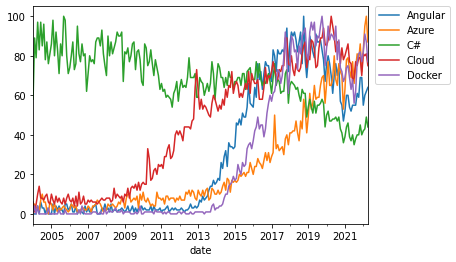

In [129]:
## Selecting columns (technologies)
technologies = df_piv.columns[1:6]

## plotting line graph
df_piv.plot(x = "date", y = technologies)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

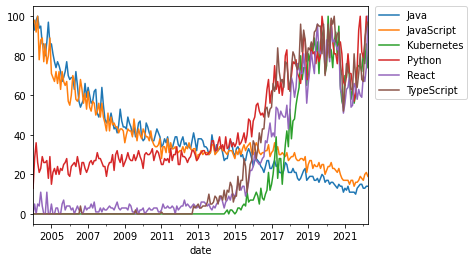

In [130]:
## Selecting columns (technologies)
technologies = df_piv.columns[6:]

## plotting line graph
df_piv.plot(x = "date", y = technologies)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

## 2. Historical Hourily Interst

In [131]:
sql = """
SELECT
*
FROM gt_historical_interest
WHERE
  date >= current_timestamp - INTERVAL '5 days'
"""

df = pd.read_sql(sql, engine)
df

,date,technology,value
0,2022-04-18 20:00:00,Angular,15.0
1,2022-04-18 20:00:00,Azure,5.0
2,2022-04-18 20:00:00,C#,13.0
3,2022-04-18 20:00:00,Cloud,52.0
4,2022-04-18 20:00:00,Docker,16.0
...,...,...,...
1095,2022-04-22 23:00:00,JavaScript,56.0
1096,2022-04-22 23:00:00,Kubernetes,0.0
1097,2022-04-22 23:00:00,Python,52.0
1098,2022-04-22 23:00:00,React,35.0


In [132]:
## prepare for plotting (pivot dataframe)
df_piv = pd.pivot_table(df, values = "value", index = "date", columns = "technology")
df_piv.reset_index(level = "date", inplace=True)
df_piv.head()

technology,date,Angular,Azure,C#,Cloud,Docker,Java,JavaScript,Kubernetes,Python,React,TypeScript
0,2022-04-18 20:00:00,15.0,5.0,13.0,52.0,16.0,26.0,12.0,4.0,28.0,15.0,5.0
1,2022-04-18 21:00:00,9.0,9.0,11.0,55.0,11.0,23.0,31.0,2.0,38.0,19.0,7.0
2,2022-04-18 22:00:00,29.0,11.0,11.0,53.0,18.0,38.0,31.0,7.0,36.0,25.0,7.0
3,2022-04-18 23:00:00,34.0,17.0,13.0,41.0,29.0,37.0,50.0,33.0,60.0,32.0,7.0
4,2022-04-19 00:00:00,29.0,7.0,0.0,37.0,20.0,57.0,25.0,0.0,71.0,54.0,0.0


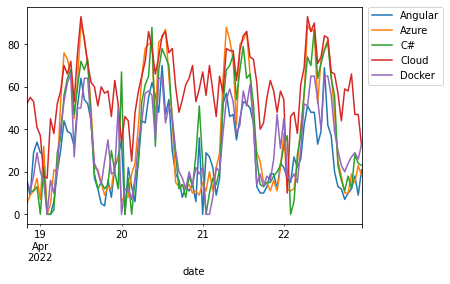

In [133]:
## Selecting columns (technologies)
technologies = df_piv.columns[1:6]

## plotting line graph
df_piv.plot(x = "date", y = technologies)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

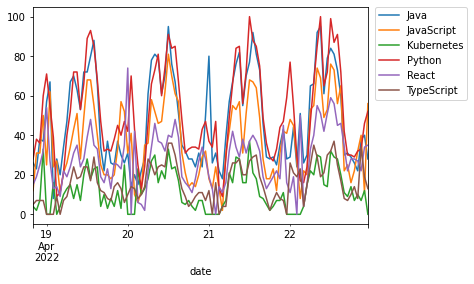

In [134]:
## Selecting columns (technologies)
technologies = df_piv.columns[6:]

## plotting line graph
df_piv.plot(x = "date", y = technologies)
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)